<a href="https://colab.research.google.com/github/shihanxie/Econ475/blob/main/Volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this cell as the first step to make sure we use the most updated version of statsmodels in python
# If it fails to import the latest version, try click Runtime -> Restart runtime and start from here again
!pip install statsmodels==0.12.0
import statsmodels

     |████████████████████████████████| 9.5MB 3.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats

The DataFrame ```usdyen``` contains the first difference of log USD/YEN exchange rate data. $\Delta \log(usdaud_t)$ also represents the growth rate of the USD/YEN exchange rate.

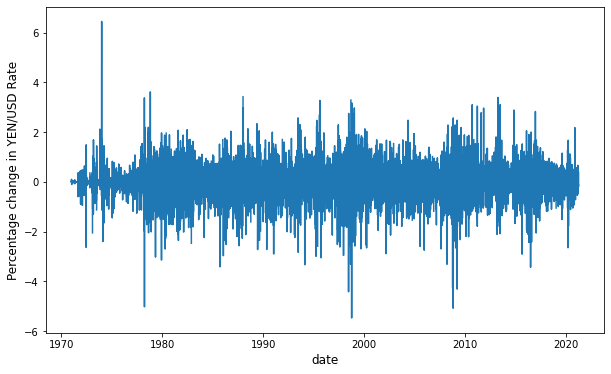

In [ ]:
usdyen = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/DEXJPUS.csv', 
                     na_values = '.', dtype={'USDYEN': np.float}, index_col='DATE')
usdyen.index = pd.to_datetime(usdyen.index)

plt.figure(figsize=(10,6))
plt.plot(usdyen['USDYEN'])
ax = plt.gca()
ax.set_ylabel('Percentage change in YEN/USD Rate', fontsize = 'large')
ax.set_xlabel('date', fontsize = 'large')
plt.show()

Compute and plot the volatility of exchange rate growth rate: $[\Delta \log(usdaud_t)]^2$

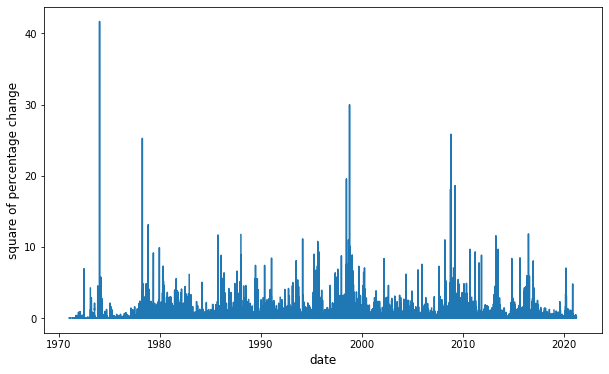

In [ ]:
usdyen['USDYEN_sq'] = usdyen['USDYEN']**2

plt.figure(figsize=(10,6))
plt.plot(usdyen['USDYEN_sq'])
ax = plt.gca()
ax.set_ylabel('square of percentage change', fontsize = 'large')
ax.set_xlabel('date', fontsize = 'large')
plt.show()

The DataFrame ```stock``` the daily return of S&P500 stock index

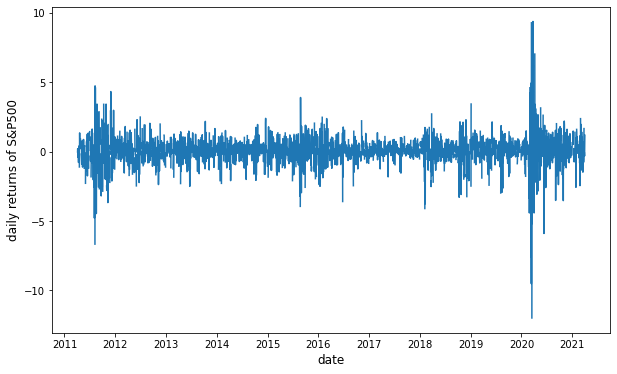

In [ ]:
stock = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/SP500.csv', 
                     na_values = '.', dtype={'SP500': np.float}, index_col = 'DATE')
stock.index = pd.to_datetime(stock.index)
stock = stock.asfreq('d')

plt.figure(figsize=(10,6))
plt.plot(stock['SP500'])
ax = plt.gca()
ax.set_ylabel('daily returns of S&P500', fontsize = 'large')
ax.set_xlabel('date', fontsize = 'large')
plt.show()

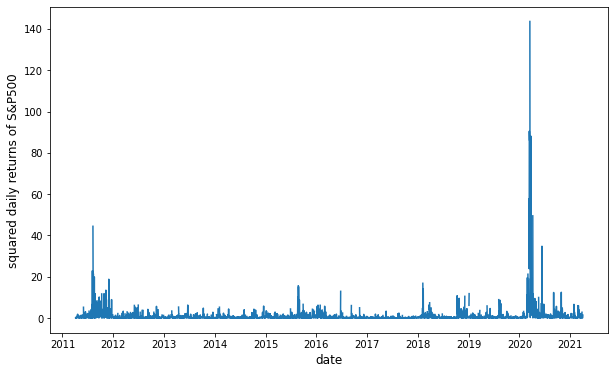

In [ ]:
stock['SP500_sq'] = stock['SP500']**2

plt.figure(figsize=(10,6))
plt.plot(stock['SP500_sq'])
ax = plt.gca()
ax.set_ylabel('squared daily returns of S&P500', fontsize = 'large')
ax.set_xlabel('date', fontsize = 'large')
plt.show()

Plot the correlogram of S&P500 daily returns 

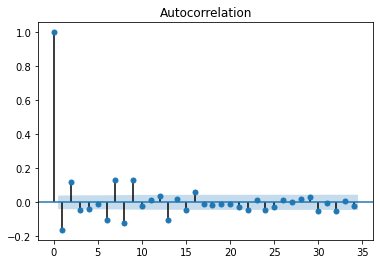

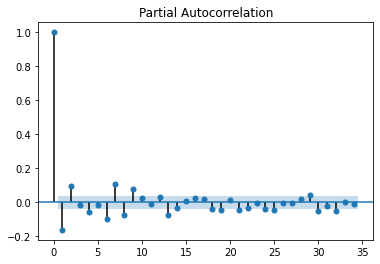

In [ ]:
plot_acf(stock['SP500'].dropna())
plot_pacf(stock['SP500'].dropna())
plt.show()

Plot the correlogram of the volatility of S&P500 daily returns

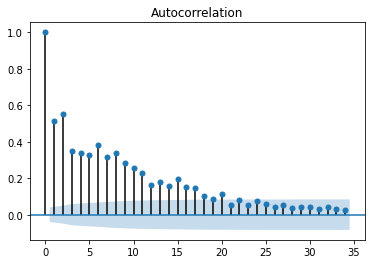

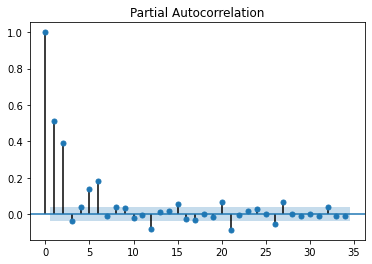

In [ ]:
plot_acf(stock['SP500_sq'].dropna())
plot_pacf(stock['SP500_sq'].dropna())
plt.show()

### Histogram and summary statistics
- Plot the histogram of S&P500 daily returns
- Print summary statistics including ```mean```, ```std```,  ```skewness```, and ```kurtosis```
- Jarque-Bera test: under the null S&500 daily returns are normally distributed

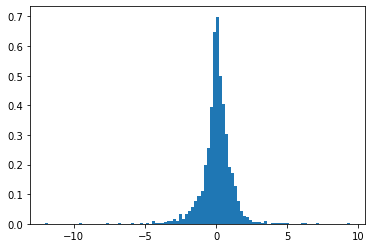

count    2423.000000
mean        0.047843
std         1.106871
min       -11.984050
25%        -0.340495
50%         0.063590
75%         0.530730
max         9.382770
Name: SP500, dtype: float64
Skewness:  -0.6651021163537466
Kurtosis:  16.664914287928642
Jarque-Bera test statistic is:  28092.66191646049
Jarque-Bera test p-value is:  0.0


In [ ]:
_,bins,_ = plt.hist(stock['SP500'],density = 1, bins=100)
plt.show()
print(stock['SP500'].describe())
print('Skewness: ', stock['SP500'].skew())
print('Kurtosis: ', stock['SP500'].kurt())
print('Jarque-Bera test statistic is: ', stats.jarque_bera(stock['SP500'].dropna())[0])
print('Jarque-Bera test p-value is: ', stats.jarque_bera(stock['SP500'].dropna())[1])

Plot the histogram of S&P500 daily returns against the best-fit normal distribution

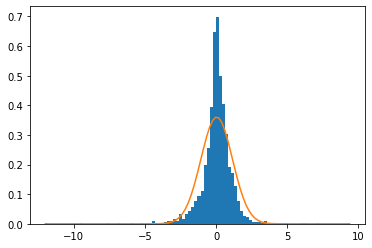

In [ ]:
mu, sigma = stats.norm.fit(stock['SP500'].dropna())
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.hist(stock['SP500'],density = 1, bins=100)
plt.plot(bins, best_fit_line)
plt.show()

Estimate an AR(5) model for squared S&P500 daily returns

In [ ]:
result_ar5 = ARIMA(stock['SP500_sq'], order=(5,0,0)).fit()
print(result_ar5.summary())

                               SARIMAX Results                                
Dep. Variable:               SP500_sq   No. Observations:                 3650
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -6925.066
Date:                Sat, 10 Apr 2021   AIC                          13864.133
Time:                        23:54:26   BIC                          13907.550
Sample:                    04-05-2011   HQIC                         13879.595
                         - 04-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1947      0.532      2.247      0.025       0.152       2.237
ar.L1          0.2746      0.003     83.592      0.000       0.268       0.281
ar.L2          0.2474      0.004     68.215      0.0

##Volatility models

In [ ]:
!pip install arch

###Estimate an ARCH model
Use the function ```arch_model()```, order ```p=5, q=0``` denotes ARCH(5)

In [ ]:
from arch import arch_model
result_arch5 = arch_model(stock['SP500'].dropna(), vol='Garch', p=5, q=0, dist='Normal').fit()
print(result_arch5.summary())

Iteration:      1,   Func. Count:      9,   Neg. LLF: 3195.6791580688673
Iteration:      2,   Func. Count:     22,   Neg. LLF: 3194.9910725990776
Iteration:      3,   Func. Count:     32,   Neg. LLF: 3137.1058860183666
Iteration:      4,   Func. Count:     42,   Neg. LLF: 3098.674248720876
Iteration:      5,   Func. Count:     52,   Neg. LLF: 3077.8069454205015
Iteration:      6,   Func. Count:     62,   Neg. LLF: 3062.8144632739854
Iteration:      7,   Func. Count:     72,   Neg. LLF: 3047.871408399983
Iteration:      8,   Func. Count:     82,   Neg. LLF: 3036.4913028673764
Iteration:      9,   Func. Count:     92,   Neg. LLF: 3025.5230121395584
Iteration:     10,   Func. Count:    102,   Neg. LLF: 3014.016980324213
Iteration:     11,   Func. Count:    112,   Neg. LLF: 3010.642822365502
Iteration:     12,   Func. Count:    122,   Neg. LLF: 3007.9743319388144
Iteration:     13,   Func. Count:    132,   Neg. LLF: 3006.4677752599064
Iteration:     14,   Func. Count:    142,   Neg. LLF: 3

Plot the correlograms of squared standardized residuals

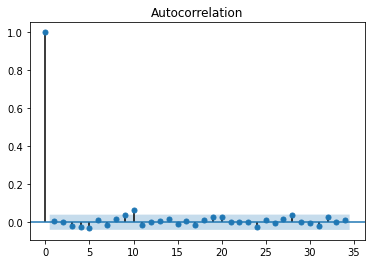

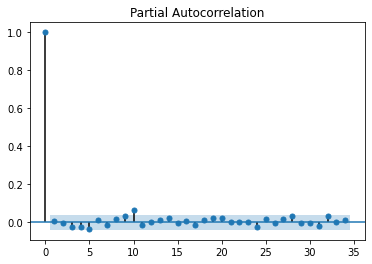

In [ ]:
stock['resid_sd_arch'] = result_arch5.std_resid**2
plot_acf(stock['resid_sd_arch'].dropna())
plot_pacf(stock['resid_sd_arch'].dropna())
plt.show()

###Estimate a GARCH model
Use the function ```arch_model()```, order ```p=1, q=1``` denotes GARCH(1,1)

In [ ]:
result_garch = arch_model(stock['SP500'].dropna(), vol='Garch', p=1, q=1, dist='Normal').fit()
print(result_garch.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2998.4051463249434
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2990.780242243211
Iteration:      3,   Func. Count:     29,   Neg. LLF: 2986.717112346969
Iteration:      4,   Func. Count:     37,   Neg. LLF: 2985.8652013559486
Iteration:      5,   Func. Count:     45,   Neg. LLF: 2985.839384568627
Iteration:      6,   Func. Count:     52,   Neg. LLF: 2985.7142531270674
Iteration:      7,   Func. Count:     58,   Neg. LLF: 2985.6309221495694
Iteration:      8,   Func. Count:     64,   Neg. LLF: 2985.629984616808
Iteration:      9,   Func. Count:     70,   Neg. LLF: 2985.629895034964
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2985.6298950351015
            Iterations: 9
            Function evaluations: 70
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  SP500   R-squared:          

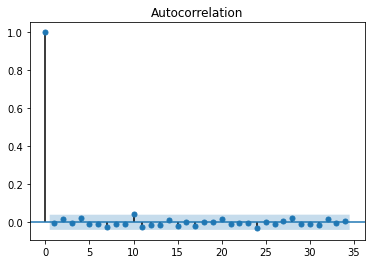

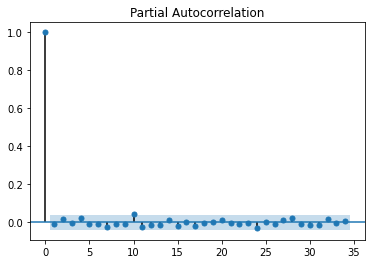

In [ ]:
stock['resid_sd_garch'] = result_garch.std_resid**2
plot_acf(stock['resid_sd_garch'].dropna())
plot_pacf(stock['resid_sd_garch'].dropna())
plt.show()

####Conditional volatility and unconditional volatility

The command ```conditional_volatility``` computes the square root of conditional variance

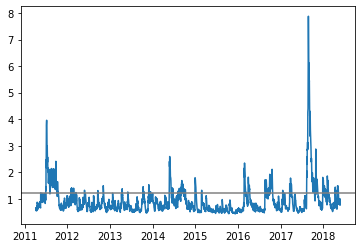

In [ ]:
omega = result_garch.params[1]
alpha = result_garch.params[2]
beta = result_garch.params[3]
unconditional_volatility = omega/(1-alpha-beta)

plt.plot(result_garch.conditional_volatility**2)
plt.axhline(unconditional_volatility, color='grey')
plt.show()

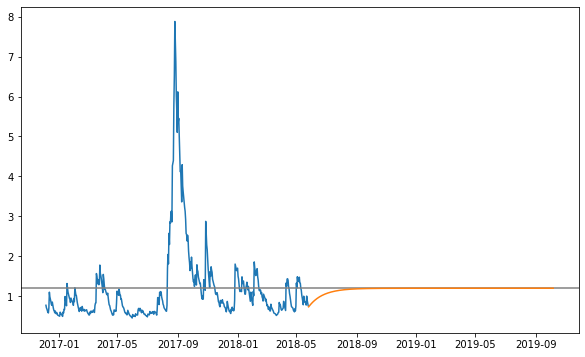

In [ ]:
y_forecast = result_garch.forecast(horizon=500, reindex=True)
forecast_horizon = pd.date_range(start=stock.index[-1], periods=501, freq='D')

plt.figure(figsize=(10,6))
plt.plot(result_garch.conditional_volatility[-500:]**2)
plt.axhline(unconditional_volatility, color='grey')
plt.plot(forecast_horizon[1:], y_forecast.residual_variance.values[-1,:])
plt.show()

###Estimate an AR(1)-GARCH(1,1) model 
Use function ```arch_model()``` with option ```mean='AR', lags = 1```

In [ ]:
result_ar_garch = arch_model(stock['SP500'].dropna(), mean='AR', lags = 1, vol='Garch', p=1, q=1, dist='Normal').fit()
print(result_ar_garch.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3005.091024313825
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2989.5986202628756
Iteration:      3,   Func. Count:     32,   Neg. LLF: 2982.630500318862
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2982.4877524036133
Iteration:      5,   Func. Count:     52,   Neg. LLF: 2981.682466870918
Iteration:      6,   Func. Count:     61,   Neg. LLF: 2981.6515003025106
Iteration:      7,   Func. Count:     69,   Neg. LLF: 2981.6181750252345
Iteration:      8,   Func. Count:     76,   Neg. LLF: 2981.5992268886794
Iteration:      9,   Func. Count:     83,   Neg. LLF: 2981.5977961783383
Iteration:     10,   Func. Count:     90,   Neg. LLF: 2981.5977895345814
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2981.597789535481
            Iterations: 10
            Function evaluations: 90
            Gradient evaluations: 10
                           AR - GARCH Model Results            

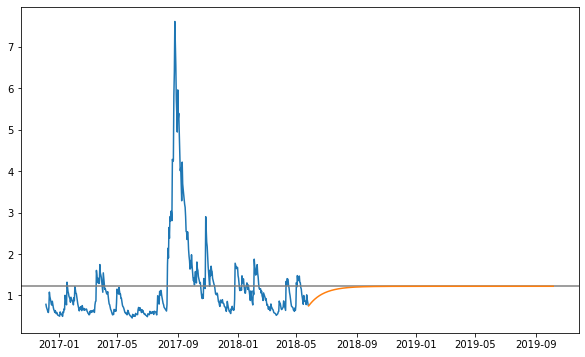

In [ ]:
y_forecast = result_ar_garch.forecast(horizon=500, reindex=True)
forecast_horizon = pd.date_range(start=stock.index[-1], periods=501, freq='D')

omega = result_ar_garch.params[2]
alpha = result_ar_garch.params[3]
beta = result_ar_garch.params[4]
unconditional_volatility = omega/(1-alpha-beta)

plt.figure(figsize=(10,6))
plt.plot(result_ar_garch.conditional_volatility[-500:]**2)
plt.axhline(unconditional_volatility, color='grey')
plt.plot(forecast_horizon[1:], y_forecast.residual_variance.values[-1,:])
plt.show()